# Importing the neccessary libraries

In [1]:
# Importing all the necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-v0_8-whitegrid")

# Importing Dataset from kaggle

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paavanesrivastava","key":"0edbab0fae3de60b4f07241423d6bded"}'}

In [4]:
#create a kaggle directory
!mkdir ~/.kaggle

In [5]:
#copy the kaggle.json file to the folder created
!cp kaggle.json ~/.kaggle/

In [6]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download razanaqvi14/real-and-fake-news

Dataset URL: https://www.kaggle.com/datasets/razanaqvi14/real-and-fake-news
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 564MB/s]


In [8]:
#unzip the dataset file
!unzip -qq "real-and-fake-news"

In [9]:
# Load the data set
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

# **Data Understanding**
- To understand the data set by checking the values, number of rows and columns.
- To understand what type of data we are dealing with.
- To describe the data an understand basic statistics of the data.

In [10]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
true.shape, fake.shape

((21417, 4), (23481, 4))

In [13]:
true.info(), fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


(None, None)

In [14]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [15]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


## Observation


*   There are two datasets available - Fake news dataset and true news dataset
*   Both of these dataset contain the same colums - `title, text,	subject,	date`
*   Fake news data set contains 23481 rows and Real news dataset contains 21417 rows.

*  The data type for all the columns in both of the dataset is `object` type.








# Checkin for Null and duplicate values.

## Fake dataset

In [16]:
fake.shape

(23481, 4)

In [17]:
(fake[fake[1:23481]==0]).sum()

,0
title,0
text,0
subject,0
date,0


In [18]:
fake.loc[fake.duplicated()]

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [19]:
# drop the duplicated rows
fake = fake.drop_duplicates().reset_index(drop = True).copy()

In [20]:
fake.shape

(23478, 4)

In [21]:
fake.isna().sum()

,0
title,0
text,0
subject,0
date,0


## Real dataset

In [22]:
true.shape

(21417, 4)

In [23]:
(true[true[1:21417]==0]).sum()

,0
title,0
text,0
subject,0
date,0


In [24]:
true.loc[true.duplicated()]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


**Note:** The title of the dataset serves as a key feature for classifying the news, so we will retain this column and not drop it.

The rest of the columns will be dealt with later on.

In [25]:
true.isna().sum()

,0
title,0
text,0
subject,0
date,0


# Merging the two data sets

In [26]:
# Adding the target column to both of these datasets
fake['label'] = 0
true['label'] = 1

In [27]:
# Merging the two dataset into one and shuffling them
from sklearn.utils import shuffle
df = pd.concat([fake, true], ignore_index=True)
df = shuffle(df, random_state=42).reset_index(drop=True)
df

,title,text,subject,date,label
0,Palin curtails Florida appearances for Trump r...,"TAMPA, Fla. (Reuters) - A serious snowmobile a...",politicsNews,"March 14, 2016",1
1,WH Official: We Will Keep Saying ‘Fake News’ ...,"Sebastian Gorka, deputy assistant to Donald Tr...",News,"February 8, 2017",0
2,Factbox: Who will Trump pick to lead the Feder...,(Reuters) - U.S. President Donald Trump has in...,politicsNews,"October 18, 2017",1
3,CNN HOST To Jill Stein: “Have You Seen Any Dir...,https://youtu.be/E2KFe_htBSA And I think the f...,left-news,"Nov 27, 2016",0
4,Polish lawmakers initially approve bill changi...,WARSAW (Reuters) - Polish lawmakers from the r...,worldnews,"November 24, 2017",1
...,...,...,...,...,...
44890,SENIOR CIA INTEL: “Wiretapping of Trump Transi...,,politics,"Mar 27, 2017",0
44891,Jordan border crossing with Iraq to reopen in ...,AMMAN (Reuters) - Jordan will open its main bo...,worldnews,"August 29, 2017",1
44892,"Egypt says three militants killed, 74 arrested...",CAIRO (Reuters) - Egyptian security forces kil...,worldnews,"November 16, 2017",1
44893,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


In [48]:
# Fake = 0 and Real/True = 1
df['label'].value_counts()

,count
label,
0,23478
1,21417


After merging the total count for


*   Real News = 21417
*   Fake News = 23478



In [49]:
# After merging checking for null/NaN values in the dataset
df.isna().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [50]:
df

,title,text,subject,date,label
0,Palin curtails Florida appearances for Trump r...,"TAMPA, Fla. (Reuters) - A serious snowmobile a...",politicsNews,"March 14, 2016",1
1,WH Official: We Will Keep Saying ‘Fake News’ ...,"Sebastian Gorka, deputy assistant to Donald Tr...",News,"February 8, 2017",0
2,Factbox: Who will Trump pick to lead the Feder...,(Reuters) - U.S. President Donald Trump has in...,politicsNews,"October 18, 2017",1
3,CNN HOST To Jill Stein: “Have You Seen Any Dir...,https://youtu.be/E2KFe_htBSA And I think the f...,left-news,"Nov 27, 2016",0
4,Polish lawmakers initially approve bill changi...,WARSAW (Reuters) - Polish lawmakers from the r...,worldnews,"November 24, 2017",1
...,...,...,...,...,...
44890,SENIOR CIA INTEL: “Wiretapping of Trump Transi...,,politics,"Mar 27, 2017",0
44891,Jordan border crossing with Iraq to reopen in ...,AMMAN (Reuters) - Jordan will open its main bo...,worldnews,"August 29, 2017",1
44892,"Egypt says three militants killed, 74 arrested...",CAIRO (Reuters) - Egyptian security forces kil...,worldnews,"November 16, 2017",1
44893,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


In [31]:
# Dropping irrelavent columns from the dataframe
data=df.drop(['date','title','subject'], axis = 1)

In [32]:
data

,text,label
0,"TAMPA, Fla. (Reuters) - A serious snowmobile a...",1
1,"Sebastian Gorka, deputy assistant to Donald Tr...",0
2,(Reuters) - U.S. President Donald Trump has in...,1
3,https://youtu.be/E2KFe_htBSA And I think the f...,0
4,WARSAW (Reuters) - Polish lawmakers from the r...,1
...,...,...
44890,,0
44891,AMMAN (Reuters) - Jordan will open its main bo...,1
44892,CAIRO (Reuters) - Egyptian security forces kil...,1
44893,Jesus f*cking Christ our President* is a moron...,0


## Observations

*   Label Encoding:
      * Assigned numerical labels to the target variable:
           *   Real news → 1
           *   Fake news → 0
*   Data Merging:
     * Merged the real and fake news datasets into a single DataFrame named df.
     * Shuffled the merged dataset to eliminate any ordering bias.

*   Data Cleaning:
     * No null values were found after merging.
     * Dropped the following irrelevant columns: title, date, and subject (as they are not required for the classification task).

* Final Structure:
  * Feature variable: text (news content)
  * Target variable: label (0 = Fake, 1 = Real)











# Preprocessing the text
To clean the sentences in the text column of your dataset, you can apply a function that performs several operations like:


*   Lowercasing
*   Removing punctuation
*   Removing stopwords (like “the”, “and”, “is”, etc.)
*   Removing URLs, numbers, and special characters
*   Stemming or lemmatization (reducing words to their root form)

In [33]:
# for text in df['text']:
#     print(text)  # or do some processing on each text

In [34]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [35]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [36]:
def clean_text(text):
    # 1. Convert to lowercase
    text = str(text).lower()

    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 6. Remove extra whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    # 7. Tokenize and remove stopwords + lemmatize words
    tokens = text.split()
    tokens = [lemma.lemmatize(word,pos ='v') for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [37]:
# Apply the clean text to the datframe
data['clean_text'] = data['text'].apply(clean_text)

In [38]:
data[44893:44894]

,text,label,clean_text
44893,Jesus f*cking Christ our President* is a moron...,0,jesus fcking christ president moron satisfy si...


X contains the text messages (features), and y contains the labels (target).

The dataset is split into training (60%) and testing (40%) sets using train_test_split.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_text']).toarray()
y = data['label']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Training the model

In [41]:
# Import the neccessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [42]:
# Define the models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC()
}

In [43]:
# Define classification evaluation function
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted', zero_division=0)
    recall = recall_score(true, predicted, average='weighted', zero_division=0)
    f1 = f1_score(true, predicted, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Store the results
model_list = []
accuracy_list = []

# Loop over models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    # Evaluate training performance
    train_acc, train_prec, train_rec, train_f1 = evaluate_classification_model(y_train, y_train_pred)
    # Evaluate testing performance
    test_acc, test_prec, test_rec, test_f1 = evaluate_classification_model(y_test, y_test_pred)

    # Append the results
    model_list.append(name)
    accuracy_list.append(test_acc)

    # Print the results
    print(name)
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_acc))
    print("- Precision: {:.4f}".format(train_prec))
    print("- Recall: {:.4f}".format(train_rec))
    print("- F1 Score: {:.4f}".format(train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_acc))
    print("- Precision: {:.4f}".format(test_prec))
    print("- Recall: {:.4f}".format(test_rec))
    print("- F1 Score: {:.4f}".format(test_f1))

    print("=" * 35)
    print("\n")

Naive Bayes
Model performance for Training set
- Accuracy: 0.9451
- Precision: 0.9451
- Recall: 0.9451
- F1 Score: 0.9451
----------------------------------
Model performance for Test set
- Accuracy: 0.9421
- Precision: 0.9423
- Recall: 0.9421
- F1 Score: 0.9422


Logistic Regression
Model performance for Training set
- Accuracy: 0.9925
- Precision: 0.9925
- Recall: 0.9925
- F1 Score: 0.9925
----------------------------------
Model performance for Test set
- Accuracy: 0.9873
- Precision: 0.9873
- Recall: 0.9873
- F1 Score: 0.9873


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9976
- Precision: 0.9976
- Recall: 0.9976
- F1 Score: 0.9976


Linear SVM
Model performance for Training set
- Accuracy: 0.9992
- Precision: 0.9992
- Recall: 0.9992
- F1 Score: 0.9992
----------------------------------
Model performance for Test set
- Accura

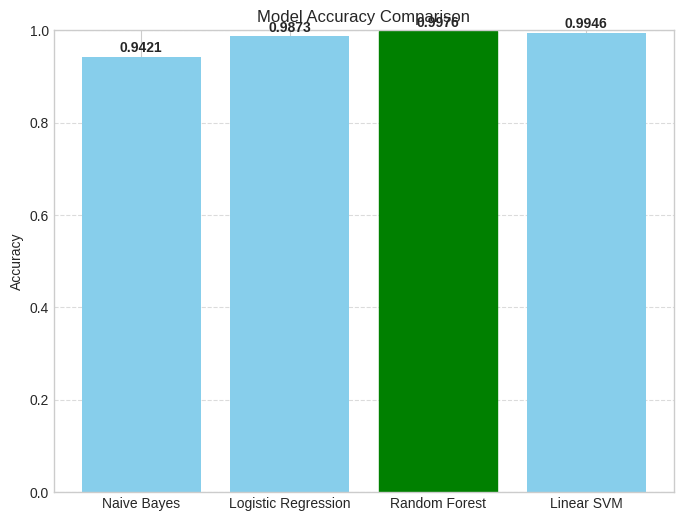

In [44]:
# Plotting the models accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = plt.bar(model_list, accuracy_list, color='skyblue')

# Highlight the best model
best_index = accuracy_list.index(max(accuracy_list))
bars[best_index].set_color('green')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, acc in enumerate(accuracy_list):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontweight='bold')

plt.show()


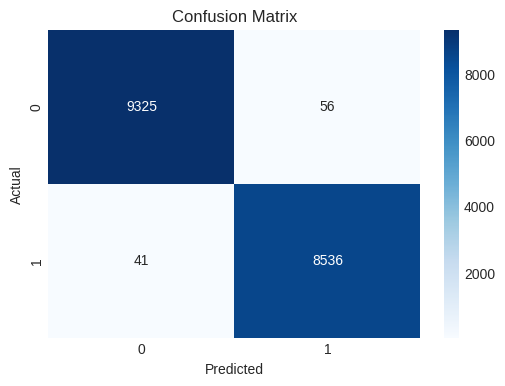

In [45]:
# Correct confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(tfidf, 'vectorizer.pkl')


['vectorizer.pkl']

# experimenting

In [ ]:
# # evaluate the model
# # Define classification evaluation function
# def evaluate_classification_model(true, predicted):
#     accuracy = accuracy_score(true, predicted)
#     precision = precision_score(true, predicted, average='weighted', zero_division=0)
#     recall = recall_score(true, predicted, average='weighted', zero_division=0)
#     f1 = f1_score(true, predicted, average='weighted', zero_division=0)
#     return accuracy, precision, recall, f1


In [ ]:
# # Store results
# model_list = []
# accuracy_list = []

In [ ]:
# # Train the models
# for name, model in models.items():
#     model.fit(X_train, y_train)

#     # Make the predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

In [ ]:
# # Evaluate Train and Test dataset

# # Evaluate training performance
# train_acc, train_prec, train_rec, train_f1 = evaluate_classification_model(y_train, y_train_pred)
# # Evaluate testing performance
# test_acc, test_prec, test_rec, test_f1 = evaluate_classification_model(y_test, y_test_pred)

# # Append results
# model_list.append(name)
# accuracy_list.append(test_acc)

In [ ]:
#  # Print results
# print(name)
# print('Model performance for Training set')
# print("- Accuracy: {:.4f}".format(train_acc))
# print("- Precision: {:.4f}".format(train_prec))
# print("- Recall: {:.4f}".format(train_rec))
# print("- F1 Score: {:.4f}".format(train_f1))

# print('----------------------------------')

# print('Model performance for Test set')
# print("- Accuracy: {:.4f}".format(test_acc))
# print("- Precision: {:.4f}".format(test_prec))
# print("- Recall: {:.4f}".format(test_rec))
# print("- F1 Score: {:.4f}".format(test_f1))

# print("=" * 35)
# print("\n")

In [ ]:
# # Evaluate Train and Test dataset
# # Evaluate training performance
# model_train_acc, model_train_prec, model_train_rec, model_train_f1 = evaluate_classification_model(y_train, y_train_pred)

# # Evaluate testing performance
# model_test_acc, model_test_prec, model_test_rec, model_test_f1 = evaluate_classification_model(y_test, y_test_pred)

# model_name = list(models.keys())[i]
# print(model_name)
# model_list.append(model_name)

# print('Model performance for Training set')
# print("- Accuracy: {:.4f}".format(model_train_acc))
# print("- Precision: {:.4f}".format(model_train_prec))
# print("- Recall: {:.4f}".format(model_train_rec))
# print("- F1 Score: {:.4f}".format(model_train_f1))

# print('----------------------------------')

# print('Model performance for Test set')
# print("- Accuracy: {:.4f}".format(model_test_acc))
# print("- Precision: {:.4f}".format(model_test_prec))
# print("- Recall: {:.4f}".format(model_test_rec))
# print("- F1 Score: {:.4f}".format(model_test_f1))

# r2_list.append(model_test_acc)  # You can rename this list if you're storing accuracy

# print('='*35)
# print('\n')

In [ ]:
# # Evaluate Train and Test dataset
# model_train_mae , model_train_rmse, model_train_r2 = evaluate_classification_model(y_train, y_train_pred)

# model_test_mae , model_test_rmse, model_test_r2 = evaluate_classification_model(y_test, y_test_pred)


# print(list(models.keys())[i])
# model_list.append(list(models.keys())[i])

# print('Model performance for Training set')
# print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
# print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
# print("- R2 Score: {:.4f}".format(model_train_r2))

# print('----------------------------------')

# print('Model performance for Test set')
# print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
# print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
# print("- R2 Score: {:.4f}".format(model_test_r2))
# r2_list.append(model_test_r2)

# print('='*35)
# print('\n')

In [ ]:
# # Train and evaluate each model
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

In [ ]:
# results = {}
# acc = accuracy_score(y_test, y_pred)
# results[name] = acc

# print(f"\n✅ {name} Accuracy: {acc:.4f}")
# print(classification_report(y_test, y_pred))

In [ ]:
# results = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"✅ {name} Accuracy: {acc:.4f}")
#     print(classification_report(y_test, y_pred))
#     results[name] = acc

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# MNB = MultinomialNB()
# MNB.fit(X_train, y_train)

In [ ]:
# from sklearn.svm import LinearSVC

# model = LinearSVC()
# model.fit(X_train, y_train)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model2 = LogisticRegression()
# model2.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# y_pred = model.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))